In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

jamestown sh
klaksvik fo
chokurdakh ru
pevek ru
fare pf
atuona pf
padang id
illoqqortoormiut gl
rikitea pf
albany au
mogadishu so
georgetown sh
esperance au
belushya guba ru
norman wells ca
batemans bay au
ponta do sol cv
ushuaia ar
atuona pf
hofn is
ushuaia ar
nanortalik gl
upernavik gl
hobart au
narsaq gl
ushuaia ar
cape town za
arraial do cabo br
saleaula ws
avarua ck
amontada br
norman wells ca
kudahuvadhoo mv
antalaha mg
bredasdorp za
bethel us
port elizabeth za
mataura pf
chuy uy
port elizabeth za
punta arenas cl
kununurra au
busselton au
khatanga ru
tuatapere nz
illoqqortoormiut gl
vila franca do campo pt
albany au
tiksi ru
mocuba mz
miri my
quito ec
bluff nz
sitka us
grand river south east mu
lebu cl
nanortalik gl
amderma ru
cozieni ro
hilo us
santa isabel do rio negro br
kodiak us
erzin ru
isangel vu
illoqqortoormiut gl
bluff nz
hammerfest no
lermontovka ru
laguna br
iracoubo gf
atuona pf
punta arenas cl
mataura pf
prince rupert ca
jamestown sh
torbay ca
bacuit ph
tarabuco bo


cape town za
hermanus za
shar kz
mataura pf
taolanaro mg
mataura pf
buta cd
leningradskiy ru
ulladulla au
bandarbeyla so
carnarvon au
east london za
guerrero negro mx
tuktoyaktuk ca
okha ru
jujuy ar
bluff nz
benghazi ly
bairiki ki
porto novo cv
punta arenas cl
guerrero negro mx
hirara jp
saint-augustin ca
mataura pf
storforshei no
leh in
mataura pf
tsihombe mg
dvinskoy ru
albany au
carnarvon au
port elizabeth za
punta arenas cl
vaini to
bredasdorp za
hilo us
kapaa us
tiksi ru
cape town za
rikitea pf
kuche cn
morondava mg
ribeira grande pt
suez eg
nikolskoye ru
garowe so
thompson ca
ca mau vn
tabialan ph
bethel us
nadym ru
belushya guba ru
yellowknife ca
tasiilaq gl
ponta do sol pt
rikitea pf
yenagoa ng
chokurdakh ru
cape town za
kalabo zm
obo cf
khatanga ru
turayf sa
illoqqortoormiut gl
poum nc
provideniya ru
cabo san lucas mx
kapaa us
tsihombe mg
atuona pf
palabuhanratu id
saskylakh ru
ushuaia ar
bredasdorp za
conde br
andenes no
castro cl
atasu kz
mar del plata ar
albany au
klaksvik 

barentsburg sj
saskylakh ru
torbay ca
la tuque ca
amderma ru
powassan ca
ushuaia ar
nouakchott mr
georgetown sh
taolanaro mg
hovd mn
rikitea pf
yellowknife ca
mana gf
albany au
albany au
mys shmidta ru
albany au
alice springs au
bluff nz
hilo us
toma bf
taolanaro mg
taolanaro mg
severo-kurilsk ru
albany au
khatanga ru
albany au
taolanaro mg
podlesnoye ru
myitkyina mm
la ronge ca
kerema pg
tapaua br
bredasdorp za
hilo us
vaini to
porto seguro br
vaini to
khatanga ru
smirnykh ru
qaanaaq gl
cape town za
taolanaro mg
mataura pf
nehe cn
san quintin mx
okhotsk ru
aripuana br
busselton au
guerrero negro mx
new norfolk au
malumfashi ng
pauini br
tasiilaq gl
mahebourg mu
mataura pf
port alfred za
tiksi ru
eyl so
norman wells ca
faya td
ushuaia ar
sentyabrskiy ru
upernavik gl
jamestown sh
saleaula ws
jamestown sh
ushuaia ar
bluff nz
lagos ng
busselton au
baykit ru
klaksvik fo
cidreira br
bredasdorp za
jamestown sh
mikkeli fi
port alfred za
los llanos de aridane es
bitterfeld de
leningradskiy ru


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | fare
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | mogadishu
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | batemans bay
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | upernavik
Processing Recor

Processing Record 40 of Set 4 | xichang
Processing Record 41 of Set 4 | san juan de uraba
Processing Record 42 of Set 4 | el retorno
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | oksfjord
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | udachnyy
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | xingtai
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | mirandela
Processing Record 1 of Set 5 | madang
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | citrus park
Processing Record 5 of Set 5 | huarmey
Processing Record 6 of Set 5 | iquique
Processing Record 7 of Set 5 | paracatu
Processing Record 8 of Set 5 | sioux lookout
Processing Record 9 of Set 5 | hobyo
Processing Record 10 of Set 5 | dolores
Processing Record 11 of Set 5 | san andres
Processing Record 12 of Set 5 | port hardy
Processing Record 13 of Set 5 | mitsamiouli
P

Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | augusto correa
Processing Record 33 of Set 8 | mount pleasant
Processing Record 34 of Set 8 | yarega
Processing Record 35 of Set 8 | juneau
Processing Record 36 of Set 8 | lagos
Processing Record 37 of Set 8 | billings
Processing Record 38 of Set 8 | tagab
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | aguas vermelhas
Processing Record 41 of Set 8 | gangotri
City not found. Skipping...
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | maribondo
Processing Record 44 of Set 8 | eureka
Processing Record 45 of Set 8 | cherskiy
Processing Record 46 of Set 8 | palu
Processing Record 47 of Set 8 | ormond beach
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | felanitx
Processing Record 50 of Set 8 | zhigansk
Processing Record 1 of Set 9 | ouadda
Processing Record 2 of Set 9 | fernie
Processing Record 3 of Set 9 | saint-francois
Processing R

Processing Record 19 of Set 12 | la ronge
Processing Record 20 of Set 12 | kerema
Processing Record 21 of Set 12 | tapaua
City not found. Skipping...
Processing Record 22 of Set 12 | porto seguro
Processing Record 23 of Set 12 | smirnykh
Processing Record 24 of Set 12 | aripuana
Processing Record 25 of Set 12 | malumfashi
Processing Record 26 of Set 12 | pauini
Processing Record 27 of Set 12 | eyl
Processing Record 28 of Set 12 | baykit
Processing Record 29 of Set 12 | mikkeli
Processing Record 30 of Set 12 | bitterfeld
Processing Record 31 of Set 12 | mandera
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,79.09,81,90,5.99,US,2021-09-13 20:53:13
1,Klaksvik,62.2266,-6.5890,52.72,91,100,19.42,FO,2021-09-13 20:53:13
2,Chokurdakh,70.6333,147.9167,40.30,77,84,3.06,RU,2021-09-13 20:53:14
3,Pevek,69.7008,170.3133,34.36,99,100,7.94,RU,2021-09-13 20:53:14
4,Fare,-16.7000,-151.0167,78.19,75,19,15.82,PF,2021-09-13 20:53:14
5,Atuona,-9.8000,-139.0333,77.77,69,37,20.89,PF,2021-09-13 20:53:15
6,Padang,-0.9492,100.3543,76.05,78,100,3.51,ID,2021-09-13 20:53:15
7,Rikitea,-23.1203,-134.9692,74.32,74,54,10.60,PF,2021-09-13 20:53:15
8,Albany,42.6001,-73.9662,77.67,54,61,9.26,US,2021-09-13 20:53:18
9,Mogadishu,2.0371,45.3438,76.95,78,100,18.66,SO,2021-09-13 20:53:18


In [36]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-09-13 20:53:13,42.0970,-79.2353,79.09,81,90,5.99
1,Klaksvik,FO,2021-09-13 20:53:13,62.2266,-6.5890,52.72,91,100,19.42
2,Chokurdakh,RU,2021-09-13 20:53:14,70.6333,147.9167,40.30,77,84,3.06
3,Pevek,RU,2021-09-13 20:53:14,69.7008,170.3133,34.36,99,100,7.94
4,Fare,PF,2021-09-13 20:53:14,-16.7000,-151.0167,78.19,75,19,15.82
...,...,...,...,...,...,...,...,...,...
531,Eyl,SO,2021-09-13 20:56:26,7.9803,49.8164,77.29,78,5,22.57
532,Baykit,RU,2021-09-13 20:56:27,61.6700,96.3700,41.13,95,100,6.35
533,Mikkeli,FI,2021-09-13 20:56:27,61.6886,27.2723,42.91,75,0,12.66
534,Bitterfeld,DE,2021-09-13 20:56:27,51.6167,12.3167,61.29,80,97,4.81


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

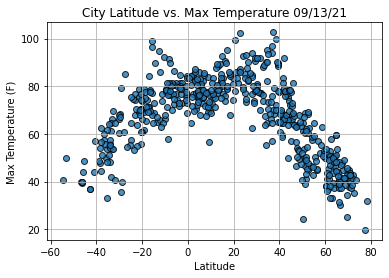

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

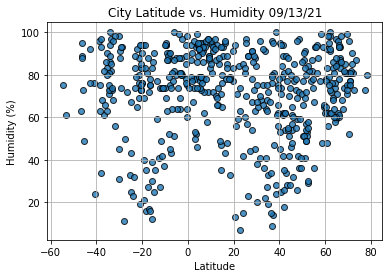

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

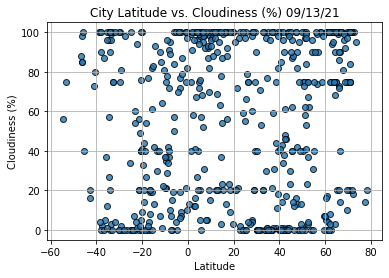

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

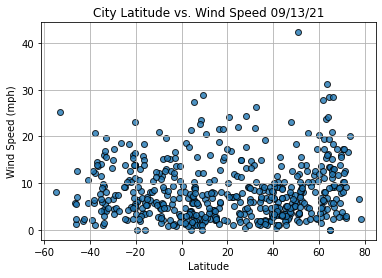

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()